## Pain assessment from biosignal data, Marita Risku
Libaries and functions used:
* numpy
* matplotlib.pyplot
* pandas 
* KNeighborsClassifier from sklearn.neighbors

Methods used:
* Z-standardization
* Key-Nearest-Neighbours-Classification
* Leave-subject-out-Cross-Validation 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

First I read in the data.
* subject: id for 31 subjects
* test: subject specific test identification number. There are 1–4 tests per subject.
* label: categories: no pain (1), mild pain (2), moderate/severe pain (3) (based on stimulus start and subject self-reporting)
* label_time: test time within the label (seconds)
* feat1,2,3 and 4: features (extracted from raw biosignals)

The data is ordered by subject|test|second.

In [2]:
df=pd.read_csv('paindata.csv')
print(df.head())
df.shape

   subject  test  label  label_time     feat1     feat2     feat3       feat4
0        1     1      1           1  1.200000  5.962879  5.939946  423.315903
1        1     1      1           2  1.200000  5.951589  5.950951  425.578340
2        1     1      1           3  1.162144  5.987670  5.950802  428.006194
3        1     1      1           4  1.157024  5.963077  6.012273  430.369485
4        1     1      1           5  1.170144  5.970446  5.974484  432.507971


(10300, 8)

In [3]:
df.describe()

,subject,test,label,label_time,feat1,feat2,feat3,feat4
count,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000
mean,16.153010,2.542913,2.297476,26.837961,0.846506,5.958591,5.959853,636.895857
std,8.516069,1.101598,0.663396,24.248825,0.173912,0.046427,0.047463,290.200617
min,1.000000,1.000000,1.000000,1.000000,0.100000,3.851259,3.909979,82.018766
25%,9.000000,2.000000,2.000000,8.000000,0.737600,5.936031,5.939857,459.436245
50%,17.000000,3.000000,2.000000,20.000000,0.833520,5.957639,5.959145,592.827917
75%,23.000000,3.000000,3.000000,40.000000,0.953492,5.979905,5.980379,807.464340
max,31.000000,4.000000,3.000000,155.000000,2.753200,6.106497,6.093551,1596.494266


I plot the label and the features of the four tests of first subject in order to understand the data better.

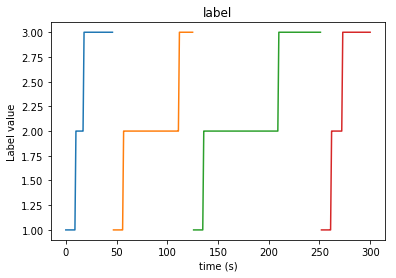

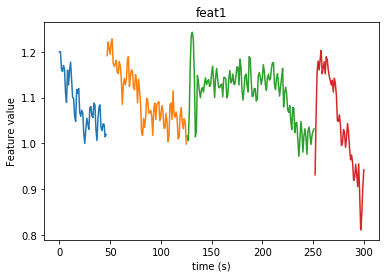

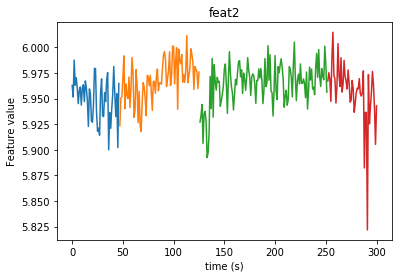

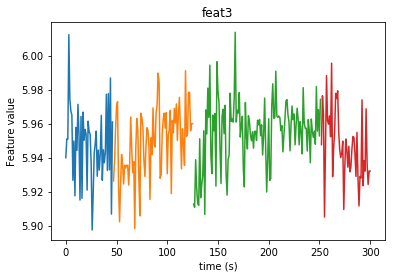

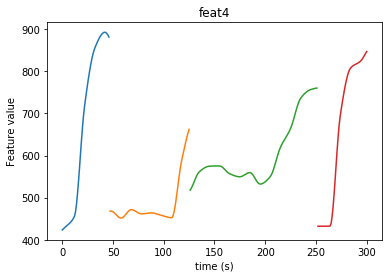

In [4]:
# subject = 1
df_1 = df.loc[df['subject'] == 1]

# subject = 1, test = 1
df_1_1 = df_1.loc[df['test'] == 1]
l_1= df_1_1.loc[:, 'label'].values
f1_1 = df_1_1.loc[:, 'feat1'].values
f2_1 = df_1_1.loc[:, 'feat2'].values
f3_1 = df_1_1.loc[:, 'feat3'].values
f4_1 = df_1_1.loc[:, 'feat4'].values

# subject = 1, test = 2
df_1_2 = df_1.loc[df['test'] == 2]
l_2= df_1_2.loc[:, 'label'].values
f1_2 = df_1_2.loc[:, 'feat1'].values
f2_2 = df_1_2.loc[:, 'feat2'].values
f3_2 = df_1_2.loc[:, 'feat3'].values
f4_2 = df_1_2.loc[:, 'feat4'].values

# subject = 1, test = 3
df_1_3 = df_1.loc[df['test'] == 3]
l_3= df_1_3.loc[:, 'label'].values
f1_3 = df_1_3.loc[:, 'feat1'].values
f2_3 = df_1_3.loc[:, 'feat2'].values
f3_3 = df_1_3.loc[:, 'feat3'].values
f4_3 = df_1_3.loc[:, 'feat4'].values

# subject = 1, test = 4
df_1_4 = df_1.loc[df['test'] == 4]
l_4= df_1_4.loc[:, 'label'].values
f1_4 = df_1_4.loc[:, 'feat1'].values
f2_4 = df_1_4.loc[:, 'feat2'].values
f3_4 = df_1_4.loc[:, 'feat3'].values
f4_4 = df_1_4.loc[:, 'feat4'].values

t1=np.arange(0,len(f1_1))
t2=np.arange(len(f1_1),len(f1_1)+ len(f1_2))
t3=np.arange(len(f1_1)+ len(f1_2),len(f1_1)+ len(f1_2) + len(f1_3))
t4=np.arange(len(f1_1)+ len(f1_2) + len(f1_3),len(f1_1)+ len(f1_2) + len(f1_3) + len(f1_4))

plt.plot(t1, l_1, t2, l_2, t3, l_3, t4,l_4)
plt.title('label')
plt.xlabel('time (s)')
plt.ylabel('Label value')
plt.show()

plt.plot(t1, f1_1, t2, f1_2, t3, f1_3, t4, f1_4)
plt.title('feat1')
plt.xlabel('time (s)')
plt.ylabel('Feature value')
plt.show()

plt.plot(t1, f2_1, t2, f2_2, t3, f2_3, t4, f2_4)
plt.title('feat2')
plt.xlabel('time (s)')
plt.ylabel('Feature value')
plt.show()

plt.plot(t1, f3_1, t2, f3_2, t3, f3_3, t4, f3_4)
plt.title('feat3')
plt.xlabel('time (s)')
plt.ylabel('Feature value')
plt.show()

plt.plot(t1, f4_1, t2, f4_2, t3, f4_3, t4, f4_4)
plt.title('feat4')
plt.xlabel('time (s)')
plt.ylabel('Feature value')
plt.show()

## Standardization on subject level
Rescaling of data (standardization, normalization) is performed to adjust the features with similar scaling to the vector space. Subject data usually requires this to be done on subject level, because we have different physical measure ranges. 

In this study case, test level rescaling can be considered as a justified method, due to the cross-over design causing re-application of sensors, but also due to the nature of some features. I will do that also in the later stage.

In [5]:
# splitting to groups on subject level
grouped = df.groupby(['subject'])

#features
featcols = ['feat1','feat2','feat3','feat4']

#standardization function
zscore = lambda x: (x - x.mean()) / x.std()

#new standardized dataframe
dfs= df.copy()
dfs[featcols] = grouped[featcols].transform(zscore)

In [6]:
#testing:
#gr = dfs.groupby(['subject'])
#print(gr[featcols].mean()) # should be = 0
#print(gr[featcols].std())  # should be = 1

In [7]:
dfs.describe()

,subject,test,label,label_time,feat1,feat2,feat3,feat4
count,10300.000000,10300.000000,10300.000000,10300.000000,1.030000e+04,1.030000e+04,1.030000e+04,1.030000e+04
mean,16.153010,2.542913,2.297476,26.837961,7.425991e-16,2.025726e-15,3.538617e-14,3.827359e-16
std,8.516069,1.101598,0.663396,24.248825,9.985425e-01,9.985425e-01,9.985425e-01,9.985425e-01
min,1.000000,1.000000,1.000000,1.000000,-4.022768e+00,-1.847554e+01,-1.655094e+01,-3.722497e+00
25%,9.000000,2.000000,2.000000,8.000000,-6.797963e-01,-5.313402e-01,-4.673737e-01,-7.333788e-01
50%,17.000000,3.000000,2.000000,20.000000,3.041787e-03,6.774026e-02,8.801729e-02,-8.797950e-02
75%,23.000000,3.000000,3.000000,40.000000,7.062913e-01,6.066816e-01,5.762348e-01,7.252548e-01
max,31.000000,4.000000,3.000000,155.000000,5.004549e+00,4.576772e+00,3.866959e+00,3.462484e+00


## Classification using Leave-subject-out Cross-Validation 

Repeated observations taken from same individual subject are considered dependent. Therefore I must use Leave-subject-out Cross-Validation (LsoCV). I divide the data into folds, where each fold consists of all observations of one subject.

I use  K-Nearest Neighbors Classification from the Scikit-learn library using Euclidean distance and uniform weights. K-value was given to be 37.

I use C-index as the accuracy measure (how well the model captures the relative ordering/ranking of the data points).

In [8]:
# function calculates C-index
def cIndex(y_true, y_predicted):
    n=0       # number of true[j] that are not same than true[i]
    h_sum=0   # predicted[i] and predicted[j] are in same order than true[i] and true[j]
    for i in range(len(y_true)):
        t=y_true[i]
        p=y_predicted[i]
        for j in range((i+1), len(y_true)): # following values
            nt=y_true[j]
            np=y_predicted[j] 
            if (t != nt): # following true value is not the same
                n=n+1
                if (t < nt and p < np) or (t > nt and p > np): # same order
                    h_sum = h_sum+1
                elif (p==np):
                    h_sum = h_sum + 0.5
    return h_sum/n  


In [9]:
from sklearn.neighbors import KNeighborsClassifier
c_indices = [] 
# f= folds of 31 subjects
for f in range(1,32):
    train = dfs.loc[df['subject'] != f] # training data = data without subject[f]
    test = dfs.loc[df['subject'] == f]  # testing data = data of the subject[f] 
    X_train=train.loc[:, 'feat1':'feat4'].values
    y_train=train.loc[:, 'label'].values
    X_test=test.loc[:, 'feat1':'feat4'].values        
    y_test=test.loc[:, 'label'].values
    knn = KNeighborsClassifier(n_neighbors=37) # model: Hyperparameter k = 37
    knn.fit(X_train,y_train)              # train the model with trainin data
    y_predicted = knn.predict(X_test)     # predict output for X_test with k nearest neighbors voting
    c_index = cIndex(y_test, y_predicted) # calclate c-index of fold f
    c_indices.append(c_index)             # save the result
    print('C-index of subject', f, ':', c_index)
print('Min C-index (subject',np.argmin(c_indices)+1,'):' , np.min(c_indices))
print('Max C-index (subject',np.argmax(c_indices)+1,'):' , np.max(c_indices))
print('Average C-index:', np.mean(c_indices))   

C-index of subject 1 : 0.7641179502282432
C-index of subject 2 : 0.5724070992789795
C-index of subject 3 : 0.5190438268892794
C-index of subject 4 : 0.6868397887323944
C-index of subject 5 : 0.5926642664266427
C-index of subject 6 : 0.48767583717166685
C-index of subject 7 : 0.6641137295081967
C-index of subject 8 : 0.6700568707842878
C-index of subject 9 : 0.5299030172413793
C-index of subject 10 : 0.5789518174133559
C-index of subject 11 : 0.6584419373662711
C-index of subject 12 : 0.6382644057392772
C-index of subject 13 : 0.652834482297035
C-index of subject 14 : 0.5592447594033401
C-index of subject 15 : 0.7888862987353575
C-index of subject 16 : 0.6853958493466564
C-index of subject 17 : 0.7015647226173541
C-index of subject 18 : 0.7106073943661971
C-index of subject 19 : 0.6479875061063165
C-index of subject 20 : 0.5145848437033562
C-index of subject 21 : 0.6614544600571451
C-index of subject 22 : 0.5180185836263185
C-index of subject 23 : 0.6671161825726141
C-index of subject 2

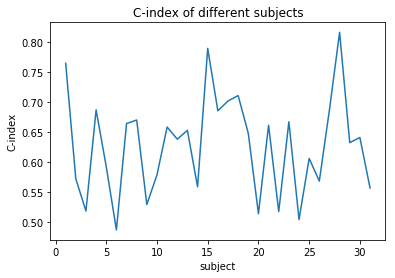

In [10]:
f = np.arange(1 , 32)
plt.plot(f, c_indices )
plt.title('C-index of different subjects')
plt.ylabel('C-index')
plt.xlabel('subject')
plt.show()

Value of C-index of 0.5 would mean that model is not able to detect any ranking between the data points. The mean value of 0.63 is not very good. As we can see the results vary a lot between subjects. I think that one problem is that in this model all the features have same impact in KNN. If I look at the plots of different features, I quess that it could be a good idea to let features 1 and 4 to have grater impact in KNN. 

The task was to standardize on subject level. I suppose that standardizing on each subject's test level will give better results.

## Standardize the data on each subject’s test level

In [11]:
# splitting to groups on eacvh subject's test level
grouped = df.groupby(['subject', 'test'])

#features
#featcols = ['feat1','feat2','feat3','feat4']

#standardization function
#zscore = lambda x: (x - x.mean()) / x.std()

#new standardized dataframe
dft= df.copy()
dft[featcols] = grouped[featcols].transform(zscore)

C-index of subject 1 : 0.8623914003828597
C-index of subject 2 : 0.7817526344980588
C-index of subject 3 : 0.5654657293497364
C-index of subject 4 : 0.7696019869215291
C-index of subject 5 : 0.679027902790279
C-index of subject 6 : 0.7519295406448401
C-index of subject 7 : 0.7141905737704918
C-index of subject 8 : 0.8899484195212274
C-index of subject 9 : 0.6643049568965518
C-index of subject 10 : 0.5881149619611158
C-index of subject 11 : 0.8786811904298775
C-index of subject 12 : 0.8988720939154454
C-index of subject 13 : 0.8831236195703099
C-index of subject 14 : 0.8338495465583032
C-index of subject 15 : 0.8466985255551023
C-index of subject 16 : 0.8553164232641558
C-index of subject 17 : 0.7774537695590327
C-index of subject 18 : 0.8490660761443662
C-index of subject 19 : 0.8545956508223173
C-index of subject 20 : 0.7350313446202397
C-index of subject 21 : 0.7080511957415163
C-index of subject 22 : 0.590143144148669
C-index of subject 23 : 0.8466286307053942
C-index of subject 24 

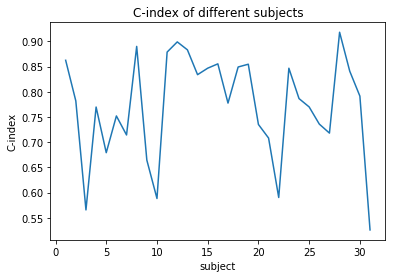

In [12]:
c_indices = [] 
# f= folds of 31 subjects
for f in range(1,32):
    train = dft.loc[df['subject'] != f] # training data = data without subject[f]
    test = dft.loc[df['subject'] == f]  # testing data = data of the subject[f] 
    X_train=train.loc[:, 'feat1':'feat4'].values
    y_train=train.loc[:, 'label'].values
    X_test=test.loc[:, 'feat1':'feat4'].values        
    y_test=test.loc[:, 'label'].values
    knn = KNeighborsClassifier(n_neighbors=37) # model: Hyperparameter k = 37
    knn.fit(X_train,y_train)              # train the model with trainin data
    y_predicted = knn.predict(X_test)     # predict output for X_test with k nearest neighbors voting
    c_index = cIndex(y_test, y_predicted) # calclate c-index of fold f
    c_indices.append(c_index)             # save the result
    print('C-index of subject', f, ':', c_index)
print('Min C-index (subject',np.argmin(c_indices)+1,'):' , np.min(c_indices))
print('Max C-index (subject',np.argmax(c_indices)+1,'):' , np.max(c_indices))
print('Average C-index:', np.mean(c_indices))

f = np.arange(1 , 32)
plt.plot(f, c_indices )
plt.title('C-index of different subjects')
plt.ylabel('C-index')
plt.xlabel('subject')
plt.show()

As it was expected, standardizing on each subject's test level give better results.

Next I want to try, what will happen, if I use standardizing on each subject's test level and use only feat1 and feat4 as features.

C-index of subject 1 : 0.8769879251951112
C-index of subject 2 : 0.7733222407099279
C-index of subject 3 : 0.5609622144112478
C-index of subject 4 : 0.7794579979879276
C-index of subject 5 : 0.6922592259225923
C-index of subject 6 : 0.7211502551973111
C-index of subject 7 : 0.7054047131147541
C-index of subject 8 : 0.9067715910593837
C-index of subject 9 : 0.647198275862069
C-index of subject 10 : 0.5625866441251056
C-index of subject 11 : 0.8930460999805485
C-index of subject 12 : 0.9014041279828129
C-index of subject 13 : 0.8794257412489124
C-index of subject 14 : 0.8362406462163635
C-index of subject 15 : 0.8462031586922315
C-index of subject 16 : 0.875992826031258
C-index of subject 17 : 0.7897866287339972
C-index of subject 18 : 0.845579335387324
C-index of subject 19 : 0.8183722410551715
C-index of subject 20 : 0.7355324320866562
C-index of subject 21 : 0.6857215546596735
C-index of subject 22 : 0.5783651431441487
C-index of subject 23 : 0.8842582987551867
C-index of subject 24 :

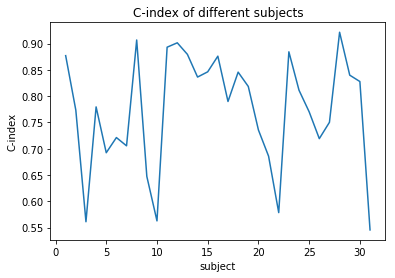

In [13]:
c_indices = [] 
# f= folds of 31 subjects
for f in range(1,32):
    train = dft.loc[df['subject'] != f] # training data = data without subject[f]
    test = dft.loc[df['subject'] == f]  # testing data = data of the subject[f] 
    X_train=train.loc[:, 'feat1':'feat4']
    X_train= X_train[['feat1','feat4']].values
    y_train=train.loc[:, 'label'].values
    X_test=test.loc[:, 'feat1':'feat4'] 
    X_test= X_test[['feat1','feat4']].values
    y_test=test.loc[:, 'label'].values
    knn = KNeighborsClassifier(n_neighbors=37) # model: Hyperparameter k = 37
    knn.fit(X_train,y_train)              # train the model with trainin data
    y_predicted = knn.predict(X_test)     # predict output for X_test with k nearest neighbors voting
    c_index = cIndex(y_test, y_predicted) # calclate c-index of fold f
    c_indices.append(c_index)             # save the result
    print('C-index of subject', f, ':', c_index)
print('Min C-index (subject',np.argmin(c_indices)+1,'):' , np.min(c_indices))
print('Max C-index (subject',np.argmax(c_indices)+1,'):' , np.max(c_indices))
print('Average C-index:', np.mean(c_indices))

f = np.arange(1 , 32)
plt.plot(f, c_indices )
plt.title('C-index of different subjects')
plt.ylabel('C-index')
plt.xlabel('subject')
plt.show()

Didn't help. The same subjects get bad results. 